In [1]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tensorflow as tf

print(tf.__version__)

2.12.0


In [3]:
#import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('Churn_Modelling.csv')
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Problem Statement : whether the customer is going to exit the bank or not

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
#remove unnecessary features 

data.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [7]:
#Divide the dataset into dependent and independend features
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [9]:
#Need to convert categorical features in numeric ones
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

cat_features = [f for f in X.columns if X[f].dtypes == 'O']
num_features = [f for f in X.columns if X[f].dtypes != 'O']

ohe = OneHotEncoder()
scaler = StandardScaler()
preprocessor =  ColumnTransformer(
    [
         ('OneHotEncoder',ohe,cat_features),
          ('Scaling',scaler,num_features)
    ]
)
   



X_train =preprocessor.fit_transform(X_train)
X_test =preprocessor.transform(X_test)


In [10]:
X_train.shape

(8000, 13)

In [11]:
#to build ANN architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, ReLU

model = Sequential()
model.add(Dense(units=11,activation='relu'))
model.add(Dense(units=7,activation='relu'))
model.add(Dense(units = 6,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=0,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [14]:
model_history = model.fit(X_train,y_train,epochs=1000,batch_size=10,validation_split=0.33,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 6s 7ms/step - loss: 0.4881 - accuracy: 0.7848 - val_loss: 0.4332 - val_accuracy: 0.8039
Epoch 2/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4215 - accuracy: 0.8093 - val_loss: 0.4049 - val_accuracy: 0.8273
Epoch 3/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3933 - accuracy: 0.8390 - val_loss: 0.3715 - val_accuracy: 0.8444
Epoch 4/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3669 - accuracy: 0.8537 - val_loss: 0.3567 - val_accuracy: 0.8523
Epoch 5/1000
536/536 [==============================] - 5s 10ms/step - loss: 0.3542 - accuracy: 0.8572 - val_loss: 0.3491 - val_accuracy: 0.8504
Epoch 6/1000
536/536 [==============================] - 5s 9ms/step - loss: 0.3502 - accuracy: 0.8614 - val_loss: 0.3443 - val_accuracy: 0.8531
Epoch 7/1000
536/536 [==============================] - 5s 9ms/step - loss: 0.3471 - accuracy: 0.8614 - val_loss: 0.3442 - val_accuracy

In [15]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

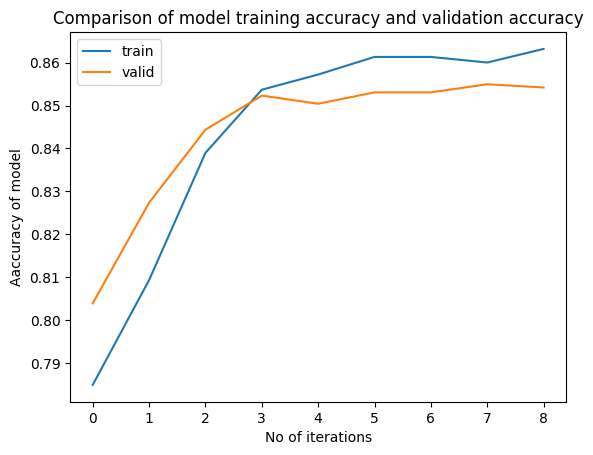

In [18]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

plt.xlabel('No of iterations')
plt.ylabel('Aaccuracy of model')
plt.title('Comparison of model training accuracy and validation accuracy')
plt.legend(['train','valid'],loc='upper left')
plt.show()

In [19]:
#predicting on test data
predictions = model.predict(X_test)

y_pred = (predictions > 0.5)

63/63 [==============================] - 0s 2ms/step


In [23]:
#performance metrics

from sklearn.metrics import confusion_matrix, accuracy_score
c = confusion_matrix(y_test,y_pred)
ac = accuracy_score(y_test,y_pred)

print("Confusion matrix: ",c)
print("Accuracy of test data: ",ac)

Confusion matrix:  [[1524   61]
 [ 220  195]]
Accuracy of test data:  0.8595


In [ ]:
model.get_weights()